当前密度: 0.57, 当前速度: 28.85, 预测密度: 0.50
未启用应急车道，交通正常。
当前密度: 0.76, 当前速度: 24.12, 预测密度: 0.68
未启用应急车道，交通正常。
当前密度: 1.14, 当前速度: 25.48, 预测密度: 1.05
启用应急车道...
应急车道启用后，密度降低到 0.94，速度提升到 33.01
拥堵解除时间: 0.00秒, 速度提升: 7.53km/h
当前密度: 0.70, 当前速度: 29.78, 预测密度: 0.63
未启用应急车道，交通正常。
当前密度: 0.88, 当前速度: 25.28, 预测密度: 0.80
启用应急车道...
应急车道启用后，密度降低到 0.76，速度提升到 33.33
拥堵解除时间: 0.00秒, 速度提升: 8.04km/h
当前密度: 0.57, 当前速度: 36.95, 预测密度: 0.50
未启用应急车道，交通正常。
当前密度: 1.17, 当前速度: 25.01, 预测密度: 1.11
启用应急车道...
应急车道启用后，密度降低到 1.02，速度提升到 30.78
拥堵解除时间: 0.00秒, 速度提升: 5.77km/h
当前密度: 0.90, 当前速度: 20.87, 预测密度: 0.81
启用应急车道...
应急车道启用后，密度降低到 0.74，速度提升到 27.44
拥堵解除时间: 0.00秒, 速度提升: 6.56km/h
当前密度: 0.80, 当前速度: 26.50, 预测密度: 0.73
启用应急车道...
应急车道启用后，密度降低到 0.61，速度提升到 32.35
拥堵解除时间: 0.00秒, 速度提升: 5.86km/h
当前密度: 0.73, 当前速度: 34.56, 预测密度: 0.65
未启用应急车道，交通正常。


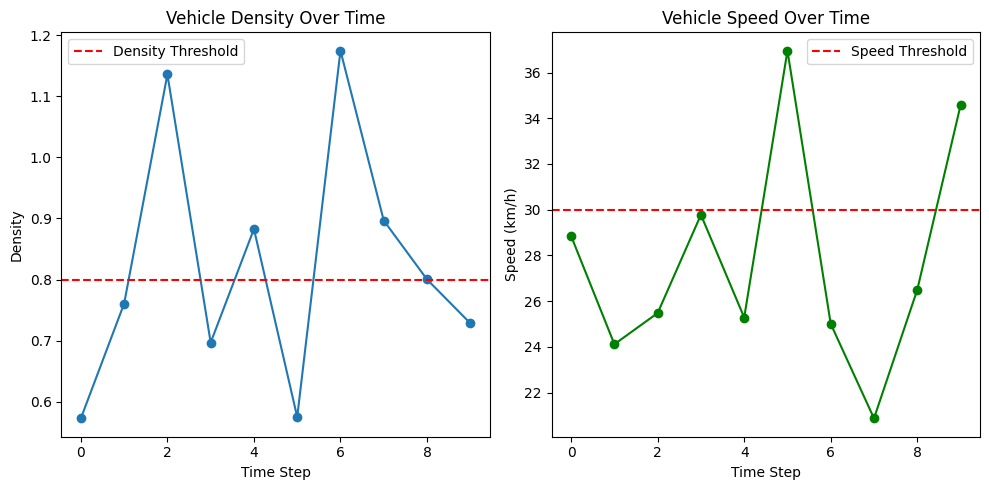

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

# 定义阈值
D_threshold = 0.8  # 密度阈值
S_threshold = 30.0  # 速度阈值

# 模拟获取监控数据
def get_monitor_data():
    D_current = np.random.uniform(0.5, 1.2)  # 当前密度
    S_current = np.random.uniform(20, 40)  # 当前速度
    D_pred = D_current - np.random.uniform(0.05, 0.1)  # 预测未来密度
    return D_current, S_current, D_pred

# 启用应急车道的决策规则
def decide_open_emergency_lane(D_current, S_current, D_pred):
    return (D_current > D_threshold and S_current < S_threshold) or (D_current > D_threshold and D_pred > D_threshold)

# 启用应急车道后的效果评估
def evaluate_effect(D_before, S_before):
    D_after = D_before - np.random.uniform(0.1, 0.2)  # 密度下降
    S_after = S_before + np.random.uniform(5, 10)  # 速度提升
    return D_after, S_after

# 计算效果评估指标
def calculate_metrics(D_after, S_after, D_before, S_before, t_start, t_end):
    T_clear = t_end - t_start  # 拥堵解除时间
    delta_S = S_after - S_before  # 速度变化量
    return T_clear, delta_S

# 主函数
def main():
    densities = []
    speeds = []
    for i in range(10):  # 模拟10次监控数据检测
        D_current, S_current, D_pred = get_monitor_data()
        densities.append(D_current)
        speeds.append(S_current)
        
        print(f"当前密度: {D_current:.2f}, 当前速度: {S_current:.2f}, 预测密度: {D_pred:.2f}")
        
        if decide_open_emergency_lane(D_current, S_current, D_pred):
            print("启用应急车道...")
            t_start = time.time()
            
            D_after, S_after = evaluate_effect(D_current, S_current)
            t_end = time.time()
            
            T_clear, delta_S = calculate_metrics(D_after, S_after, D_current, S_current, t_start, t_end)
            print(f"应急车道启用后，密度降低到 {D_after:.2f}，速度提升到 {S_after:.2f}")
            print(f"拥堵解除时间: {T_clear:.2f}秒, 速度提升: {delta_S:.2f}km/h")
        else:
            print("未启用应急车道，交通正常。")
        
        time.sleep(1)  # 模拟实时监控数据的间隔时间

    # 数据可视化
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(densities, marker='o')
    plt.axhline(y=D_threshold, color='r', linestyle='--', label='Density Threshold')
    plt.title('Vehicle Density Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(speeds, marker='o', color='g')
    plt.axhline(y=S_threshold, color='r', linestyle='--', label='Speed Threshold')
    plt.title('Vehicle Speed Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Speed (km/h)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
